In [93]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from math import isnan
import numpy as np
import pandas as pd

In [100]:
fullData = pd.read_csv('train.csv')
fullData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [94]:
index = 0
for age in fullData["Age"]:
    if isnan(age):
        fullData["Age"][index] = 20
    index += 1
    
piecesAmount = 50
amount_of_neighbors = []
prediction_accuracy = []

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [95]:
trainDataAmount = int(len(fullData) / piecesAmount) * (piecesAmount - 1)
if trainDataAmount == 0:
    trainDataAmount = 1

In [96]:
train_df = fullData[:trainDataAmount]
test_df = fullData[trainDataAmount:]

x = train_df["Age"]
x = pd.DataFrame(x)
y = train_df["Survived"]

In [97]:
for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x, y)

    y_predict = knn.predict(pd.DataFrame(test_df["Age"]))
    accuracy = metrics.accuracy_score(test_df["Survived"], y_predict)
    
    if k < 10:
        print("k = ",k,end="  | accuracy = ")
    else:
        print("k = ",k,end=" | accuracy = ")

    print("%.2f% %" % accuracy)
    
    amount_of_neighbors.append(k)
    prediction_accuracy.append(accuracy * 100)

k =  1  | accuracy = 0.52%
k =  2  | accuracy = 0.67%
k =  3  | accuracy = 0.66%
k =  4  | accuracy = 0.66%
k =  5  | accuracy = 0.67%
k =  6  | accuracy = 0.64%
k =  7  | accuracy = 0.64%
k =  8  | accuracy = 0.62%
k =  9  | accuracy = 0.59%
k =  10 | accuracy = 0.62%
k =  11 | accuracy = 0.62%
k =  12 | accuracy = 0.62%
k =  13 | accuracy = 0.62%
k =  14 | accuracy = 0.62%
k =  15 | accuracy = 0.62%
k =  16 | accuracy = 0.62%
k =  17 | accuracy = 0.62%
k =  18 | accuracy = 0.62%
k =  19 | accuracy = 0.64%
k =  20 | accuracy = 0.62%
k =  21 | accuracy = 0.62%
k =  22 | accuracy = 0.62%
k =  23 | accuracy = 0.62%
k =  24 | accuracy = 0.62%
k =  25 | accuracy = 0.62%
k =  26 | accuracy = 0.62%
k =  27 | accuracy = 0.60%
k =  28 | accuracy = 0.60%
k =  29 | accuracy = 0.60%
k =  30 | accuracy = 0.60%
k =  31 | accuracy = 0.59%
k =  32 | accuracy = 0.60%
k =  33 | accuracy = 0.60%
k =  34 | accuracy = 0.60%
k =  35 | accuracy = 0.59%
k =  36 | accuracy = 0.59%
k =  37 | accuracy = 0.62%
k

In [98]:
import matplotlib.pyplot as plt

##### The relationship between accuracy and amount of neighbors when discovering the relationship between name length and survived

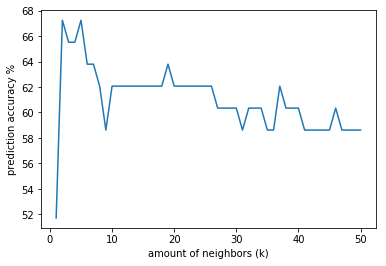

In [99]:
plt.plot(amount_of_neighbors, prediction_accuracy)
plt.xlabel("amount of neighbors (k)")
plt.ylabel("prediction accuracy %")
plt.show()